In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)  # (50000, 32, 32, 3)
print(x_test.shape)   # (10000, 32, 32, 3)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 759s 4us/step 
(50000, 32, 32, 3)
(10000, 32, 32, 3)


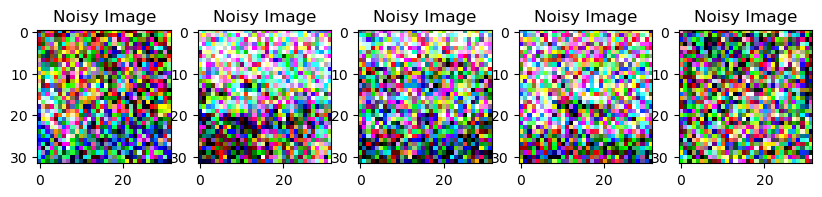

In [3]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy Image")
    plt.gray()
plt.show()

In [4]:
def build_autoencoder():
    input_img = Input(shape=(32, 32, 3))


    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)


    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    return autoencoder

In [5]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer=Adam(), loss='mse')

autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - loss: 0.0178 - val_loss: 0.0133
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - loss: 0.0121 - val_loss: 0.0118
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - loss: 0.0113 - val_loss: 0.0116
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 12/50
391/391 ━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


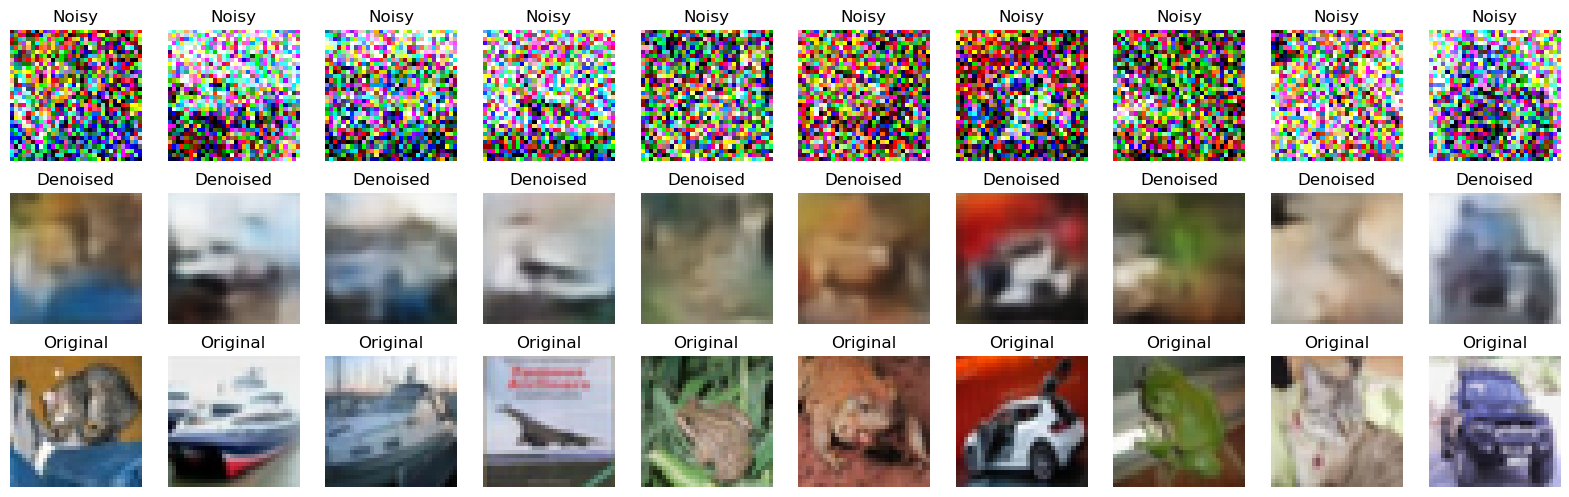

In [6]:
denoised_images = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    #  original noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    #  denoised images
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(denoised_images[i])
    plt.title("Denoised")
    plt.axis('off')

    #  original clean images
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')
plt.show()